In [1]:
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Load and Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combo_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
combo_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

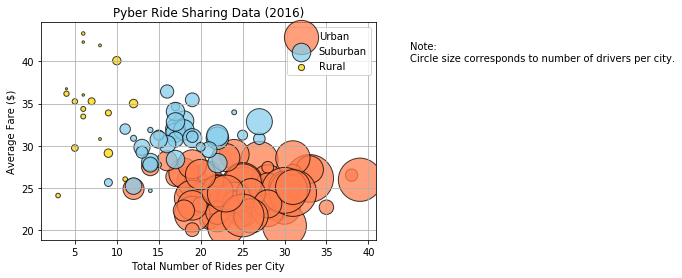

In [8]:
# Obtain the x and y coordinates for each of the three city types
#Data by City Type
urb = combo_df.loc[combo_df["type"] == "Urban", :]
sub = combo_df.loc[combo_df["type"] == "Suburban", :]
rur = combo_df.loc[combo_df["type"] == "Rural", :]

#Urban Cities
urb_fares = urb.groupby("city").mean()["fare"]
urb_rides = urb.groupby("city").count()["fare"]
urb_drivers = urb.groupby("city").sum()["driver_count"]

#Suburban Cities
sub_fares = sub.groupby("city").mean()["fare"]
sub_rides = sub.groupby("city").count()["fare"]
sub_drivers = sub.groupby("city").sum()["driver_count"]

#Rural Cities
rur_fares = rur.groupby("city").mean()["fare"]
rur_rides = rur.groupby("city").count()["fare"]
rur_drivers = rur.groupby("city").sum()["driver_count"]

# Build the scatter plots for each city types
Urban = plt.scatter(urb_rides, urb_fares, s=urb_drivers, color="coral", alpha=0.75, edgecolors="black")
Suburban = plt.scatter(sub_rides, sub_fares, s=sub_drivers, color="skyblue", alpha=0.75, edgecolors="black")
Rural = plt.scatter(rur_rides, rur_fares, s=rur_drivers, color="gold", alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(("Urban", "Suburban", "Rural"), loc="upper right")

# Incorporate a text label regarding circle size
t = "Note:\nCircle size corresponds to number of drivers per city."
plt.text(45, 40, t)
           
# Save Figure
plt.savefig("Pyber Ride Sharing Plot.png")

## Total Fares by City Type

<IPython.core.display.Javascript object>


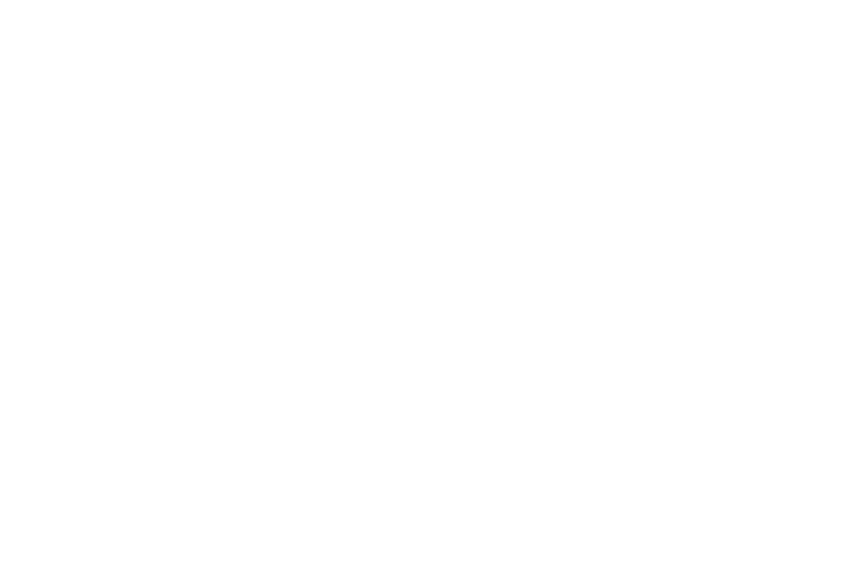

<IPython.core.display.Javascript object>


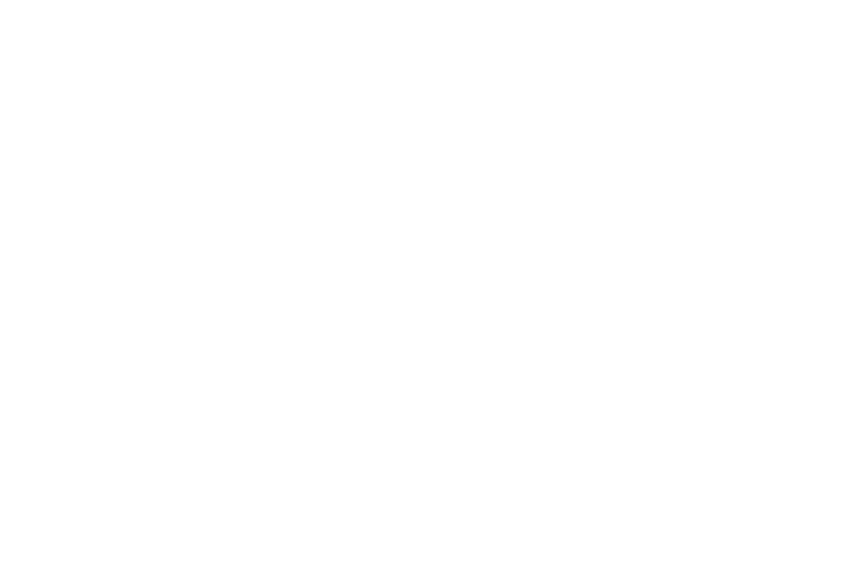

In [15]:
# Calculate Fare Percents
tot_fares = combo_df["fare"].sum()

urb_fares_sum = combo_df.loc[combo_df["type"] == "Urban", :].sum()
urb_fares_pct = (urb_fares_sum["fare"]/tot_fares) * 100

sub_fares_sum = combo_df.loc[combo_df["type"] == "Suburban", :].sum()
sub_fares_pct = (sub_fares_sum["fare"]/tot_fares) * 100

rur_fares_sum = combo_df.loc[combo_df["type"] == "Rural", :].sum()
rur_fares_pct = (rur_fares_sum["fare"]/tot_fares) * 100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urb_fares_pct, sub_fares_pct, rur_fares_pct]
colors = ["coral", "skyblue", "gold"]
explode = (0.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100) 

plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type.png")

## Total Rides by City Type

<IPython.core.display.Javascript object>


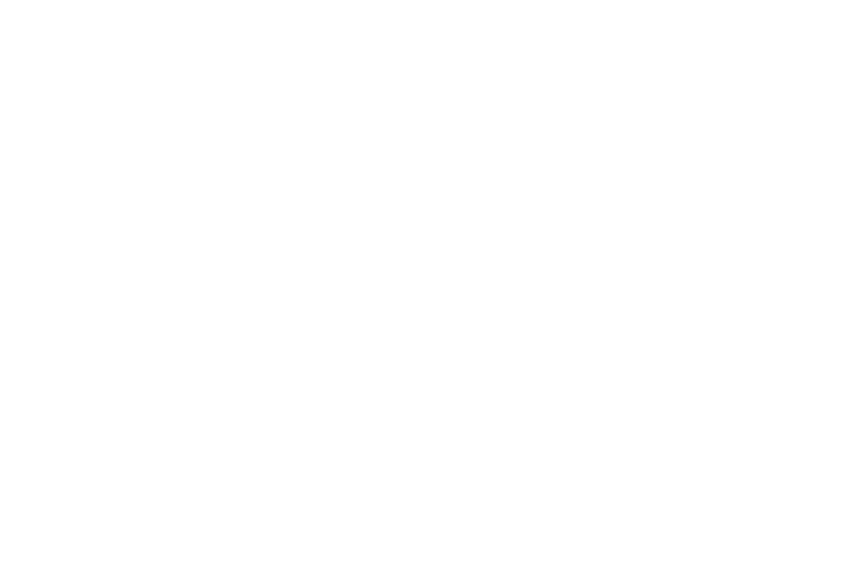

<IPython.core.display.Javascript object>


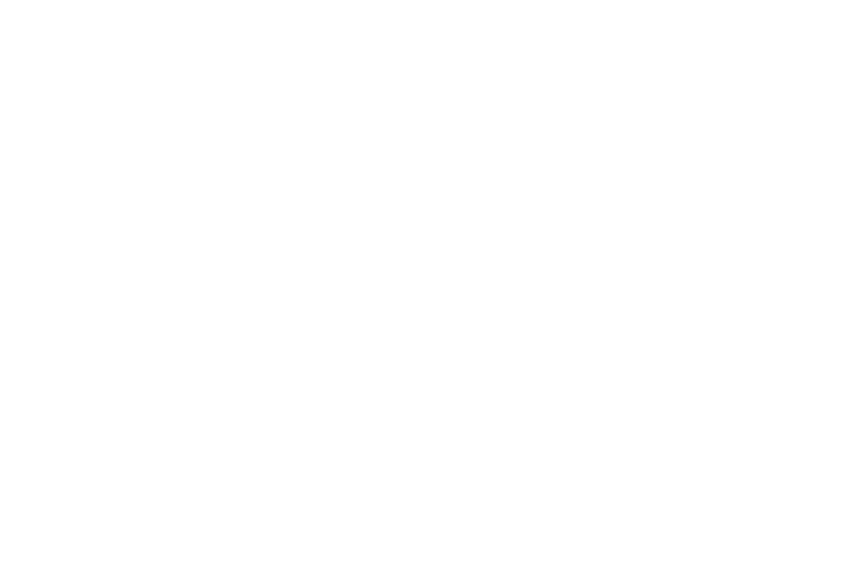

In [16]:
# Calculate Ride Percents
tot_rides = combo_df["fare"].count()

urb_rides_cnt = combo_df.loc[combo_df["type"] == "Urban", :].count()
urb_rides_pct = (urb_rides_cnt["fare"]/tot_rides) * 100

sub_rides_cnt = combo_df.loc[combo_df["type"] == "Suburban", :].count()
sub_rides_pct = (sub_rides_cnt["fare"]/tot_rides) * 100

rur_rides_cnt = combo_df.loc[combo_df["type"] == "Rural", :].count()
rur_rides_pct = (rur_rides_cnt["fare"]/tot_rides) * 100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urb_rides_pct, sub_rides_pct, rur_rides_pct]
colors = ["coral", "skyblue", "gold"]
explode = (0.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100) 

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type.png")

## Total Drivers by City Type

<IPython.core.display.Javascript object>


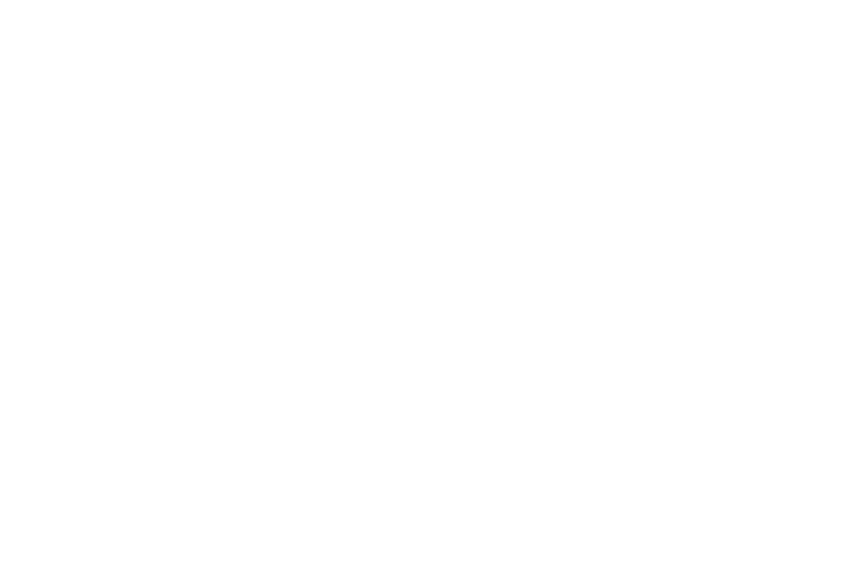

<IPython.core.display.Javascript object>


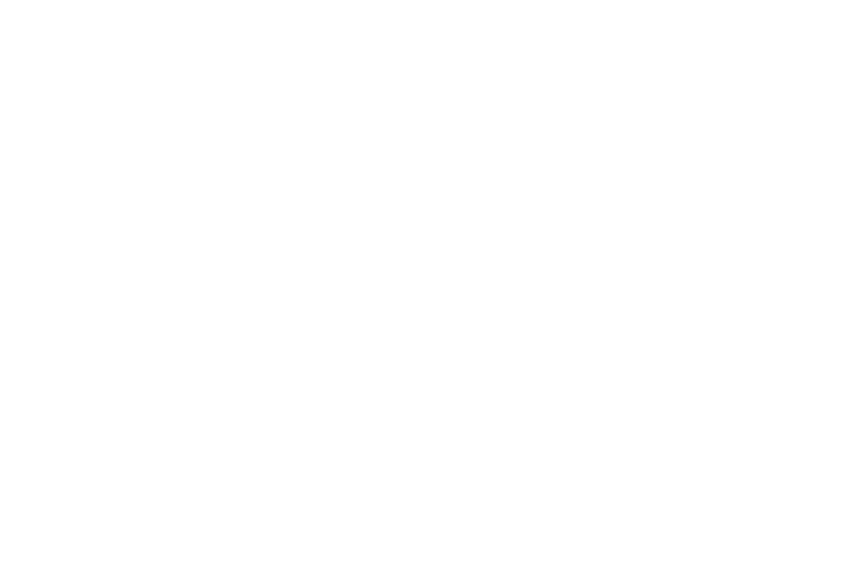

In [17]:
# Calculate Driver Percents
tot_drivers = city_df["driver_count"].sum()

urb_drivers_sum = city_df.loc[city_df["type"] == "Urban", :].sum()
urb_drivers_pct = (urb_drivers_sum["driver_count"]/tot_drivers) * 100

sub_drivers_sum = city_df.loc[city_df["type"] == "Suburban", :].sum()
sub_drivers_pct = (sub_drivers_sum["driver_count"]/tot_drivers) * 100

rur_drivers_sum = city_df.loc[city_df["type"] == "Rural", :].sum()
rur_drivers_pct = (rur_drivers_sum["driver_count"]/tot_drivers) * 100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urb_drivers_pct, sub_drivers_pct, rur_drivers_pct]
colors = ["coral", "skyblue", "gold"]
explode = (0.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100) 

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type.png")